In [4]:
using GrootSim

using CSV
using DataFrames
using Dates
using DotEnv
DotEnv.load!()
# using Distributions
using PyPlot
using Serialization
using SimpleHypergraphs
using Statistics

using PyCall
pickle = pyimport("pickle");

## Loading the data

In [5]:
basepath = ENV["BASEPATH"]
datapath = ENV["DATA_PATH"]
data_to_include_path = ENV["DATA_TO_INCLUDE_PATH"];
precomputed_params_path = ENV["PRECOMPUTED_PARAMS_PATH"];

In [6]:
hour_params_path = joinpath(precomputed_params_path, "sixhours", "all");
halfday_params_path = joinpath(precomputed_params_path, "halfday", "all");
day_params_path = joinpath(precomputed_params_path, "day", "all");
week_params_path = joinpath(precomputed_params_path, "week", "all");

In [7]:
reddittors_to_include = Set(pickle.load(open(joinpath(data_to_include_path, "final_users_to_include.pkl"))))
subs_to_include = (pickle.load(open(joinpath(data_to_include_path, "final_subs_to_include.pkl"))))
subs_to_include = Set([sub_id[4:end] for sub_id in subs_to_include]);

## Get the hyperedge size distribution

In [5]:
function get_path(window_size::String)
    to_return = nothing
    if window_size == "hour"
        to_return = hour_path
    elseif window_size == "halfday"
        to_return = halfday_path
    elseif window_size == "day"
        to_return = day_path
    elseif window_size == "week"
        to_return =  week_path
    else
        error("Invalid window size")
    end

    to_return
end

get_path (generic function with 1 method)

In [6]:
function get_structure(window_size::String)
    to_return = nothing
    
    if window_size == "hour"
        to_return = hour_he_sizes, snap_hour_he_sizes
    elseif window_size == "halfday"
        to_return = halfday_he_sizes, snap_halfday_he_sizes
    elseif window_size == "day"
        to_return = day_he_sizes, snap_day_he_sizes
    elseif window_size == "week"
        to_return =  week_he_sizes, snap_week_he_sizes
    else
        error("Invalid window size")
    end

    to_return
end

get_structure (generic function with 1 method)

In [7]:
# he sizes 
hour_he_sizes = Array{Array{Int, 1}, 1}()
halfday_he_sizes = Array{Array{Int, 1}, 1}()
day_he_sizes = Array{Array{Int, 1}, 1}()
week_he_sizes = Array{Array{Int, 1}, 1}()
;

# he sizes 
snap_hour_he_sizes = Array{Array{Int, 1}, 1}()
snap_halfday_he_sizes = Array{Array{Int, 1}, 1}()
snap_day_he_sizes = Array{Array{Int, 1}, 1}()
snap_week_he_sizes = Array{Array{Int, 1}, 1}()
;

In [101]:
window_size = "hour"
path = get_path(window_size)
he_sizes, snap_he_sizes = get_structure(window_size)

# data
sim_intervals = deserialize(open(joinpath(path, "sim_intervals.ser"), "r"))
intervals = deserialize(open(joinpath(path, "intervals.ser"), "r"))
println(length(intervals), " ", length(sim_intervals))

In [ ]:
# create he dist based on sliding window
for (i, period) in enumerate(sim_intervals)
    println("evaluating period $i/$(length(sim_intervals))")
    s_date = period.first
    obs_date = period.second

    hg, v_to_id, he_to_id = create_subreddits_hg(
        datapath,
        subs_to_include,
        reddittors_to_include;
        mindate=s_date,
        maxdate=obs_date,
        #subreddits_to_include=nothing,
        ignore_NI=true,
        verbose=false
    )

    _he_sizes = [length(getvertices(hg, he)) for he in 1:nhe(hg)]
    push!(he_sizes, _he_sizes)
end

evaluating period 1/3592
evaluating period 2/3592
evaluating period 3/3592
evaluating period 4/3592
evaluating period 5/3592
evaluating period 6/3592
evaluating period 7/3592
evaluating period 8/3592
evaluating period 9/3592
evaluating period 10/3592
evaluating period 11/3592
evaluating period 12/3592
evaluating period 13/3592
evaluating period 14/3592
evaluating period 15/3592
evaluating period 16/3592
evaluating period 17/3592
evaluating period 18/3592
evaluating period 19/3592
evaluating period 20/3592
evaluating period 21/3592
evaluating period 22/3592
evaluating period 23/3592
evaluating period 24/3592
evaluating period 25/3592
evaluating period 26/3592
evaluating period 27/3592
evaluating period 28/3592
evaluating period 29/3592
evaluating period 30/3592
evaluating period 31/3592
evaluating period 32/3592
evaluating period 33/3592
evaluating period 34/3592
evaluating period 35/3592
evaluating period 36/3592
evaluating period 37/3592
evaluating period 38/3592
evaluating period 39/

In [93]:
intervals;

In [ ]:
# create he dist based on temporal snapshots
left = Dates.DateTime(2020, 07, 1, 0, 0, 0)

for (i, right) in enumerate(intervals)
    println("evaluating period $i/$(length(intervals)): $left - $right")
    s_date = left
    obs_date = right

    hg, v_to_id, he_to_id = create_subreddits_hg(
        datapath,
        subs_to_include,
        reddittors_to_include;
        mindate=s_date,
        maxdate=right,
        #subreddits_to_include=nothing,
        ignore_NI=true,
        verbose=false
    )

    left = right

    _he_sizes = [length(getvertices(hg, he)) for he in 1:nhe(hg)]
    push!(snap_he_sizes, _he_sizes)
end

evaluating period 1/3652: 2020-07-01T00:00:00 - 2020-07-01T06:00:00
evaluating period 2/3652: 2020-07-01T06:00:00 - 2020-07-01T12:00:00
evaluating period 3/3652: 2020-07-01T12:00:00 - 2020-07-01T18:00:00
evaluating period 4/3652: 2020-07-01T18:00:00 - 2020-07-02T00:00:00
evaluating period 5/3652: 2020-07-02T00:00:00 - 2020-07-02T06:00:00
evaluating period 6/3652: 2020-07-02T06:00:00 - 2020-07-02T12:00:00
evaluating period 7/3652: 2020-07-02T12:00:00 - 2020-07-02T18:00:00
evaluating period 8/3652: 2020-07-02T18:00:00 - 2020-07-03T00:00:00
evaluating period 9/3652: 2020-07-03T00:00:00 - 2020-07-03T06:00:00
evaluating period 10/3652: 2020-07-03T06:00:00 - 2020-07-03T12:00:00
evaluating period 11/3652: 2020-07-03T12:00:00 - 2020-07-03T18:00:00
evaluating period 12/3652: 2020-07-03T18:00:00 - 2020-07-04T00:00:00
evaluating period 13/3652: 2020-07-04T00:00:00 - 2020-07-04T06:00:00
evaluating period 14/3652: 2020-07-04T06:00:00 - 2020-07-04T12:00:00
evaluating period 15/3652: 2020-07-04T12:00

Excessive output truncated after 524355 bytes.

In [ ]:
# # store the data
# outpath = "data"
# # serialize(joinpath(outpath, "$(window_size)_he_sizes.ser"), he_sizes)
# serialize(joinpath(outpath, "snap_$(window_size)_he_sizes.ser"), snap_he_sizes)

In [92]:
length(snap_he_sizes)

3652

## Loading hyperedge size data

In [33]:
he_sizes_path = ENV["HE_SIZES_PATH"]
he_sizes_path = joinpath(he_sizes_path, "across_time");

In [34]:
hour_he_sizes = deserialize(open(joinpath(he_sizes_path, "hour_he_sizes.ser"), "r"))
halfday_he_sizes = deserialize(open(joinpath(he_sizes_path, "halfday_he_sizes.ser"), "r"))
day_he_sizes = deserialize(open(joinpath(he_sizes_path, "day_he_sizes.ser"), "r"))
week_he_sizes = deserialize(open(joinpath(he_sizes_path, "week_he_sizes.ser"), "r"));

In [35]:
snap_hour_he_sizes = deserialize(open(joinpath(he_sizes_path, "snap_hour_he_sizes.ser"), "r"))
snap_halfday_he_sizes = deserialize(open(joinpath(he_sizes_path, "snap_halfday_he_sizes.ser"), "r"))
snap_day_he_sizes = deserialize(open(joinpath(he_sizes_path, "snap_day_he_sizes.ser"), "r"))
snap_week_he_sizes = deserialize(open(joinpath(he_sizes_path, "snap_week_he_sizes.ser"), "r"));

In [6]:
hour_he_sizes, halfday_he_sizes, day_he_sizes, week_he_sizes

([[3], [3, 2, 6, 6], [1, 2, 3, 2, 11, 2, 7], [2], [3, 1], [6, 2, 7, 2, 1], [6, 2, 16, 2, 2, 2, 2, 4, 1, 1, 4, 2, 1, 2], [6, 2, 2, 9, 3, 2, 1, 2, 2, 1  …  2, 1, 1, 1, 1, 5, 2, 2, 2, 1], [6, 2, 2, 10, 3, 2, 1, 2, 1, 2  …  2, 1, 1, 1, 1, 5, 2, 2, 2, 1], [6, 2, 2, 11, 3, 2, 1, 2, 2, 1  …  2, 1, 1, 1, 1, 5, 2, 2, 2, 1]  …  [2, 3, 1, 8, 2, 2, 2, 2, 2, 2  …  2, 2, 9, 1, 2, 7, 28, 3, 2, 2], [2, 2, 1, 1, 16, 1, 1, 1, 1, 1  …  1, 2, 1, 2, 1, 1, 4, 1, 1, 1], [3, 2, 2, 1, 1, 1, 20, 1, 1, 1  …  2, 1, 2, 1, 1, 5, 1, 1, 1, 1], [3, 2, 2, 1, 1, 21, 1, 1, 1, 1  …  1, 2, 1, 1, 2, 5, 1, 1, 1, 1], [3, 2, 2, 2, 1, 1, 22, 1, 1, 1  …  1, 2, 1, 1, 2, 5, 1, 1, 1, 1], [3, 2, 2, 2, 1, 1, 22, 1, 1, 1  …  2, 1, 1, 2, 5, 1, 1, 1, 1, 1], [3, 2, 2, 2, 1, 1, 23, 1, 1, 1  …  2, 1, 1, 2, 5, 1, 1, 1, 1, 1], [3, 2, 2, 2, 1, 1, 25, 1, 1, 1  …  2, 1, 1, 3, 5, 1, 1, 1, 1, 1], [3, 2, 2, 2, 1, 1, 25, 1, 1, 1  …  2, 1, 1, 3, 5, 1, 1, 1, 1, 1], [3, 2, 2, 2, 1, 1, 25, 1, 1, 1  …  2, 1, 1, 3, 5, 1, 1, 1, 1, 1]], [[3], [1, 2, 3, 2, 

In [7]:
week_he_sizes

124-element Vector{Vector{Int64}}:
 [5, 2, 1, 1, 2, 1]
 [2, 2, 4, 2, 2, 2, 2, 5, 2, 2  …  4, 3, 4, 2, 1, 4, 2, 2, 2, 1]
 [2, 2, 3, 2, 1, 1, 2]
 [2, 1, 3, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2]
 [2, 2, 1, 2, 1, 1, 2, 2, 7, 1, 1, 1, 1, 1, 2, 1, 1]
 [1, 2, 1, 4, 1, 1, 1, 2, 1]
 [3, 7, 5, 2, 3, 1, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1]
 [3, 1, 1]
 [1, 1, 1, 1, 2, 3, 2, 1, 2, 3  …  1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
 [3, 1, 1, 2, 6, 2, 2, 2, 2, 1  …  1, 12, 1, 1, 1, 1, 1, 1, 1, 2]
 ⋮
 [2, 1, 2, 2, 2, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 3, 1, 2, 3  …  1, 2, 1, 2, 2, 2, 2, 2, 2, 1]
 [4, 2, 7, 2, 1, 2, 1, 1]
 [2, 2, 9, 2, 1, 2, 2, 2, 3, 2  …  1, 2, 1, 2, 11, 1, 2, 2, 4, 1]
 [2, 2, 3, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1]
 [3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 5, 2, 1]
 [2, 1]
 [2, 3, 2, 2, 3, 1, 2, 1, 2, 3  …  2, 2, 9, 1, 2, 7, 28, 3, 2, 2]

## Get some stats on the distribution of hyperedge size

In [11]:
function get_he_sizes(he_sizes::Array{Array{Int, 1}, 1})
    to_return = Array{Array{Int, 1}, 1}()

    for (idx, _he_sizes) in enumerate(he_sizes)
        he_sizes_sim_step = [he_s for he_s in _he_sizes if he_s > 2]
        push!(to_return, he_sizes_sim_step)
    end
    
    to_return
end

get_he_sizes (generic function with 1 method)

In [12]:
function get_he_sizes_stats(he_sizes::Array{Array{Int, 1}, 1})
    to_return = [] #Array{NamedTuple{Int64, Int64, Float64, Float64, Float64}, 1}()

    for (idx, he_sizes_sim_step) in enumerate(he_sizes)
        if length(he_sizes_sim_step) == 0
            push!(to_return, (min=0, max=0, mean=0, std=0, median=0))
        else

            min_he_size = minimum(he_sizes_sim_step)
            max_he_size = maximum(he_sizes_sim_step)
            mean_he_size = mean(he_sizes_sim_step)

            if length(he_sizes_sim_step) == 1
                std_he_size = 0.0
            else
                std_he_size = std(he_sizes_sim_step)
            end

            median_he_size = median(he_sizes_sim_step)
            
            push!(
                to_return, 
                (min=min_he_size, max=max_he_size, mean=mean_he_size, std=std_he_size, median=median_he_size)
            )
        end
    end
    
    to_return
end

get_he_sizes_stats (generic function with 1 method)

In [13]:
hour_he_sizes = get_he_sizes(hour_he_sizes)
halfday_he_sizes = get_he_sizes(halfday_he_sizes)
day_he_sizes = get_he_sizes(day_he_sizes)
week_he_sizes = get_he_sizes(week_he_sizes);

In [185]:
hour_he_sizes;

In [14]:
# now we need the avg he size
hour_he_sizes_stats = get_he_sizes_stats(hour_he_sizes)
halfday_he_sizes_stats = get_he_sizes_stats(halfday_he_sizes)
day_he_sizes_stats = get_he_sizes_stats(day_he_sizes)
week_he_sizes_stats = get_he_sizes_stats(week_he_sizes);

In [184]:
# (mean_he_size, std_he_size, median_he_size)
hour_he_sizes_stats;

In [15]:
snap_hour_he_sizes = get_he_sizes(snap_hour_he_sizes)
snap_halfday_he_sizes = get_he_sizes(snap_halfday_he_sizes)
snap_day_he_sizes = get_he_sizes(snap_day_he_sizes)
snap_week_he_sizes = get_he_sizes(snap_week_he_sizes)

snap_hour_he_sizes_stats = get_he_sizes_stats(snap_hour_he_sizes)
snap_halfday_he_sizes_stats = get_he_sizes_stats(snap_halfday_he_sizes)
snap_day_he_sizes_stats = get_he_sizes_stats(snap_day_he_sizes)
snap_week_he_sizes_stats = get_he_sizes_stats(snap_week_he_sizes);

## Plot hyperedge size data

### Line plot

In [16]:
function generate_line_plot(ax, data, colors)
    means = [d.mean for d in data]
    medians = [d.median for d in data]
    max = [d.max for d in data]
    min = [d.min for d in data]

    # ax.plot(means, label="mean", color=colors[1], linewidth=0.5)
    # ax.plot(medians, label="median", color=colors[2], linewidth=0.5)
    ax.plot(max, label="max", color=colors[3], linewidth=0.5)
    # ax.fill_between(
    #     1:length(data),
    #     [d.mean - d.std for d in data],
    #     [d.mean + d.std for d in data],
    #     color="blue",
    #     alpha=0.2,
    #     label="std"
    # )

    # try interpolation
    # x = 1:length(data)
    # x_min = 0
    # x_max = maximum([d.max for d in data])

    # itp_cubic = Interpolations.cubic_spline_interpolation(x, means)
    # f_cubic(x) = itp_cubic(x)
    # ax.plot(f_cubic, x, linestyle=:dash, w=3, label="Cubic Spline interpolation")
end

generate_line_plot (generic function with 1 method)

In [17]:
clf()

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# labels = ["singletons", "edges", "hyperedges"]
labels = ["mean", "median"]
colors = ["blue", "orange", "green"]
width = 1

1

In [18]:
generate_line_plot(ax[1,1], hour_he_sizes_stats, colors)
generate_line_plot(ax[1,2], halfday_he_sizes_stats, colors)
generate_line_plot(ax[2,1], day_he_sizes_stats, colors)
generate_line_plot(ax[2,2], week_he_sizes_stats, colors)

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x33db75fd0>

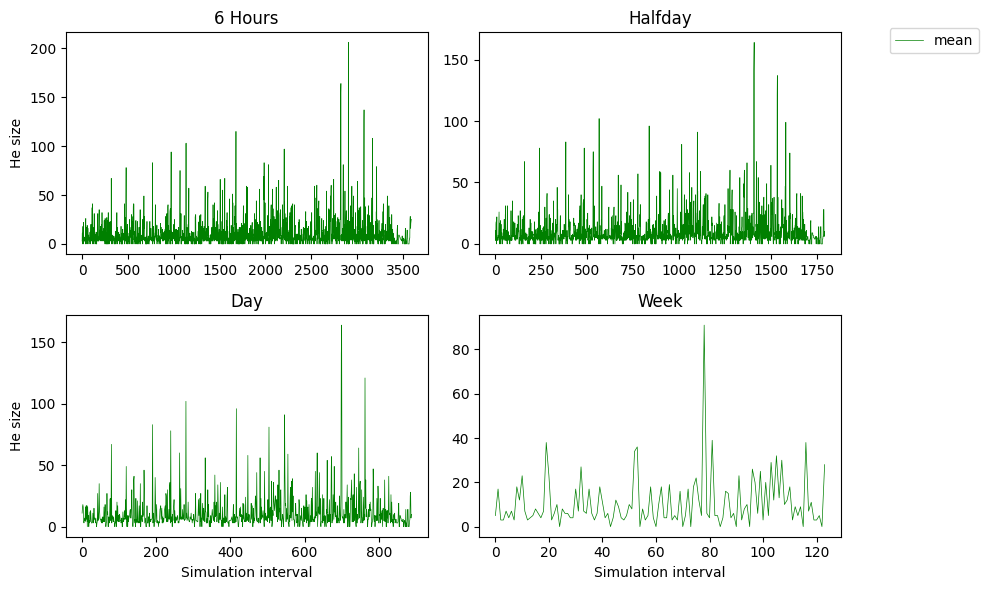

In [20]:
# x infos
# set x axis labels
ax[2,1].set_xlabel("Simulation interval")
ax[2,2].set_xlabel("Simulation interval")

# set y axis labels
ax[1,1].set_ylabel("He size")
ax[2,1].set_ylabel("He size")

# set titles
ax[1,1].set_title("6 Hours")
ax[1,2].set_title("Halfday")
ax[2,1].set_title("Day")
ax[2,2].set_title("Week")

ax[1,2].legend(labels, loc="upper right", bbox_to_anchor=(1.4, 1.05))

plt.tight_layout()
# savefig("hyperedges_distribution.png")
gcf()

### CDF

In [21]:
function eval_ccdf(data, metric)
    # get the data of interest 
    _data = [getfield(d, metric) for d in data]
    # Get the he size sequence and sort in descending order
    data_sequence = sort(_data, rev=true)
    
    # Count occurrences of each degree
    data_count = Dict{Union{Int, Float64}, Int}()
    for d in data_sequence
        data_count[d] = get(data_count, d, 0) + 1
    end
    
    # Convert to arrays for degrees and counts
    # deg = collect(keys(data_count))
    # cnt = collect(values(data_count))
    deg = sort(collect(keys(data_count)), rev=true)
    cnt = [data_count[d] for d in deg]
    
    # Calculate cumulative sum
    cs = cumsum(cnt)
    
    return deg, cs
end 

eval_ccdf (generic function with 1 method)

In [141]:
# def eval_ccdf(graph):
#     degree_sequence = sorted([d for _, d in graph.in_degree()], reverse=True)  # degree sequence
#     degreeCount = collections.Counter(degree_sequence)
#     deg, cnt = zip(*degreeCount.items())
#     cs = np.cumsum(cnt)
#     return deg, cs

In [22]:
size_hour, cs_hour = eval_ccdf(hour_he_sizes_stats, :max)
size_halfday, cs_halfday = eval_ccdf(halfday_he_sizes_stats, :max)
size_day, cs_day = eval_ccdf(day_he_sizes_stats, :max)
size_week, cs_week = eval_ccdf(week_he_sizes_stats, :max);

In [23]:
snap_size_hour, snap_cs_hour = eval_ccdf(snap_hour_he_sizes_stats, :median)
snap_size_halfday, snap_cs_halfday = eval_ccdf(snap_halfday_he_sizes_stats, :median)
snap_size_day, snap_cs_day = eval_ccdf(snap_day_he_sizes_stats, :median)
snap_size_week, snap_cs_week = eval_ccdf(snap_week_he_sizes_stats, :median);

sys:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.


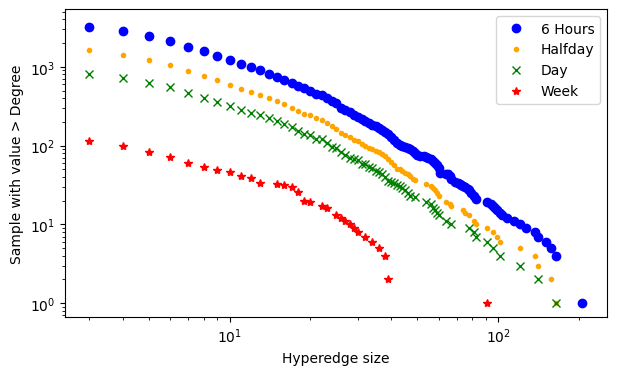

In [24]:
# now we plot the ccdf 
# in a single plot
# plt.loglog(deg_before, cs_before, 'bo')
# plt.loglog(deg_before_backbone, cs_before_backbone, 'ro')
# plt.title("Cumulative Distribution plot")
# plt.ylabel("Sample with value > Degree")
# plt.xlabel("Degree")
# plt.show()

clf()

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# plot the ccdf
ax.loglog(size_hour, cs_hour, label="6 Hours", color="blue", "bo") #linewidth=0.5)
ax.loglog(size_halfday, cs_halfday, label="Halfday", color="orange", ".") #, linewidth=0.5)
ax.loglog(size_day, cs_day, label="Day", color="green", "x") #, linewidth=0.5)
ax.loglog(size_week, cs_week, label="Week", color="red", "*") #, linewidth=0.5)

# set x axis labels
ax.set_xlabel("Hyperedge size")
# set y axis labels
ax.set_ylabel("Sample with value > Degree")

# legend
labels = ["6 Hours", "Halfday", "Day", "Week"]
ax.legend(labels, loc="upper right")

gcf()

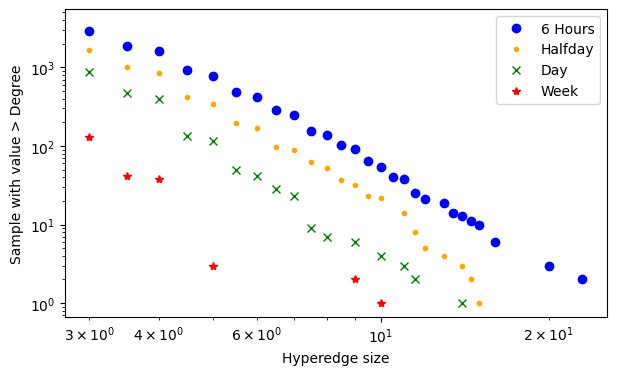

In [25]:
clf()

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# plot the ccdf
ax.loglog(snap_size_hour, snap_cs_hour, label="6 Hours", color="blue", "bo") #linewidth=0.5)
ax.loglog(snap_size_halfday, snap_cs_halfday, label="Halfday", color="orange", ".") #, linewidth=0.5)
ax.loglog(snap_size_day, snap_cs_day, label="Day", color="green", "x") #, linewidth=0.5)
ax.loglog(snap_size_week, snap_cs_week, label="Week", color="red", "*") #, linewidth=0.5)

# set x axis labels
ax.set_xlabel("Hyperedge size")
# set y axis labels
ax.set_ylabel("Sample with value > Degree")

# legend
labels = ["6 Hours", "Halfday", "Day", "Week"]
ax.legend(labels, loc="upper right")

gcf()


## Prepare the data to plot (fraction of edges/hyperedges)

In [39]:
function prepare_data(he_sizes::Array{Array{Int, 1}, 1})
    to_return = Array{Array{Float64, 1}, 1}()
    
    for (idx, _he_sizes) in enumerate(he_sizes)
        n_he = length(_he_sizes)

        singletons = length([he for he in _he_sizes if he == 1])/n_he
        edge = length([he for he in _he_sizes if he == 2])/n_he
        he = length([he for he in _he_sizes if he > 2])/n_he

        push!(to_return, [singletons, edge, he])
    end

    to_return
end

prepare_data (generic function with 1 method)

In [ ]:
# singletons, edges, hyperedges
# ! reload the data
hour_data = prepare_data(hour_he_sizes)
halfday_data = prepare_data(halfday_he_sizes)
day_data = prepare_data(day_he_sizes)
week_data = prepare_data(week_he_sizes);

In [ ]:
# singletons, edges, hyperedges
# ! reload the data
snap_hour_data = prepare_data(snap_hour_he_sizes)
snap_halfday_data = prepare_data(snap_halfday_he_sizes)
snap_day_data = prepare_data(snap_day_he_sizes)
snap_week_data = prepare_data(snap_week_he_sizes);

## Plot the fraction of edges/hyperedges

### Bar chart

In [29]:
function generate_bar_plot(ax, data)

    bottom = zeros(length(data))

    for (sim_interval, interval_data) in enumerate(data)
        for (idx, d) in enumerate(interval_data)
            ax.bar(
                sim_interval,
                d,
                width,
                label=labels[idx],
                color=colors[idx],
                bottom=bottom[sim_interval]
            )
            bottom[sim_interval] += d
        end
        # sim_interval > 10 && break
    end
end

generate_bar_plot (generic function with 1 method)

#### Sliding-window

In [42]:
clf()

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

labels = ["singletons", "edges", "hyperedges"]
colors = ["blue", "orange", "green"]
width = 1

1

In [43]:
generate_bar_plot(ax[1,1], hour_data)
generate_bar_plot(ax[1,2], halfday_data)
generate_bar_plot(ax[2,1], day_data)
generate_bar_plot(ax[2,2], week_data)

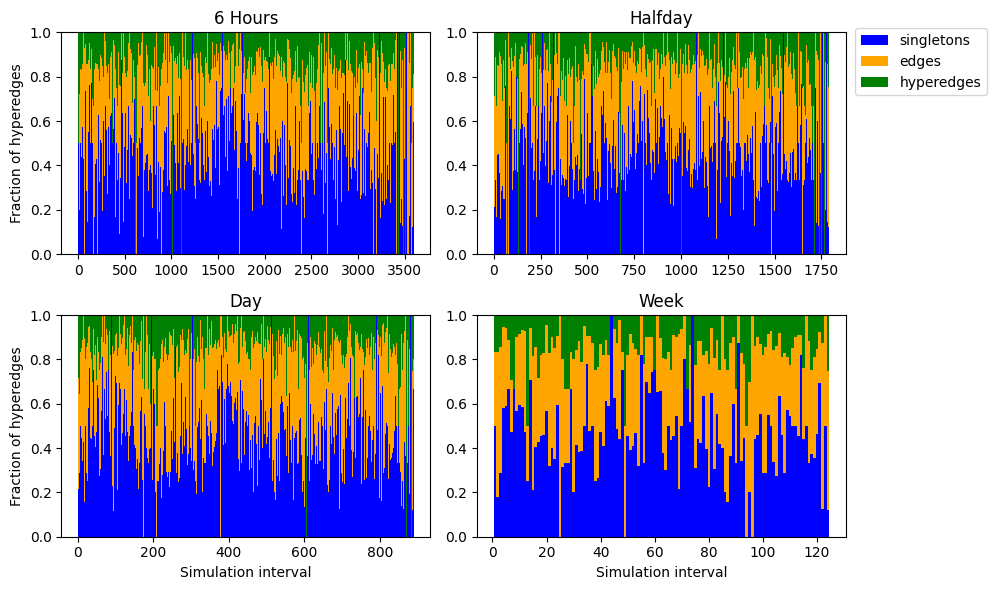

In [44]:
# x infos
# set x axis labels
ax[2,1].set_xlabel("Simulation interval")
ax[2,2].set_xlabel("Simulation interval")

# set y axis labels
ax[1,1].set_ylabel("Fraction of hyperedges")
ax[2,1].set_ylabel("Fraction of hyperedges")

# set titles
ax[1,1].set_title("6 Hours")
ax[1,2].set_title("Halfday")
ax[2,1].set_title("Day")
ax[2,2].set_title("Week")

ax[1,2].legend(labels, loc="upper right", bbox_to_anchor=(1.4, 1.05))

plt.tight_layout()
# savefig("hyperedges_distribution.png")
gcf()

#### Snapshots

In [47]:
clf()

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

labels = ["singletons", "edges", "hyperedges"]
colors = ["blue", "orange", "green"]
width = 1;

In [48]:
generate_bar_plot(ax[1,1], snap_hour_data)
generate_bar_plot(ax[1,2], snap_halfday_data)
generate_bar_plot(ax[2,1], snap_day_data)
generate_bar_plot(ax[2,2], snap_week_data)

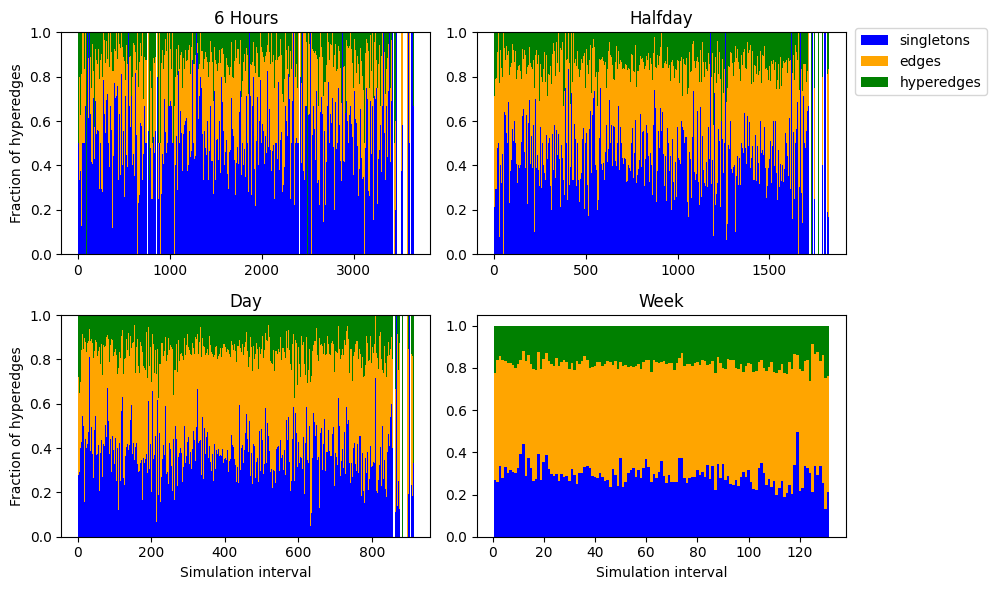

In [49]:
# x infos
# set x axis labels
ax[2,1].set_xlabel("Simulation interval")
ax[2,2].set_xlabel("Simulation interval")

# set y axis labels
ax[1,1].set_ylabel("Fraction of hyperedges")
ax[2,1].set_ylabel("Fraction of hyperedges")

# set titles
ax[1,1].set_title("6 Hours")
ax[1,2].set_title("Halfday")
ax[2,1].set_title("Day")
ax[2,2].set_title("Week")

ax[1,2].legend(labels, loc="upper right", bbox_to_anchor=(1.4, 1.05))

plt.tight_layout()
gcf()

### Boxplot

In [50]:
# singletons, edges, hyperedges
function get_boxplot_data(data)

    singletons = [d[1] for d in data if !isnan(d[1])]
    edges = [d[2] for d in data if !isnan(d[2])]
    hyperedges = [d[3] for d in data if !isnan(d[3])]

    singletons, edges, hyperedges
end

get_boxplot_data (generic function with 1 method)

In [51]:
function set_box_color(bp, color)
    plt.setp(bp["boxes"], color=color)
    plt.setp(bp["whiskers"], color=color)
    plt.setp(bp["caps"], color=color)
    plt.setp(bp["medians"], color=color)
end

set_box_color (generic function with 1 method)

#### Sliding window

In [52]:
singletons = Array{Array{Float64, 1}, 1}()
edges = Array{Array{Float64, 1}, 1}()
hes = Array{Array{Float64, 1}, 1}()

s_day, e_day, h_day = get_boxplot_data(hour_data)
push!(singletons, s_day)
push!(edges, e_day)
push!(hes, h_day)
;

s_halfday, e_halfday, h_halfday = get_boxplot_data(halfday_data)
push!(singletons, s_halfday)
push!(edges, e_halfday)
push!(hes, h_halfday)
;

# day
s_day, e_day, h_day = get_boxplot_data(day_data)
push!(singletons, s_day)
push!(edges, e_day)
push!(hes, h_day)
;

# week
s_week, e_week, h_week = get_boxplot_data(week_data)
push!(singletons, s_week)
push!(edges, e_week)
push!(hes, h_week)
;

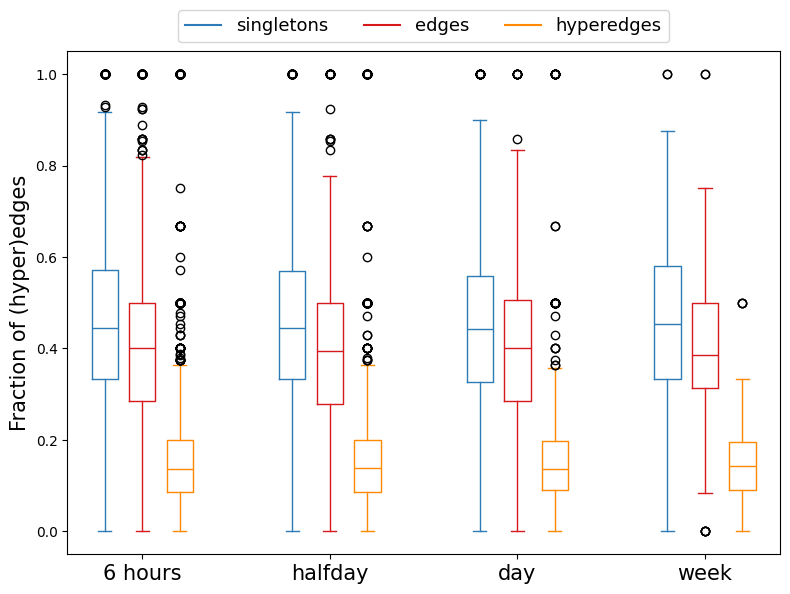

In [54]:
clf()

fig, ax = plt.subplots(1, figsize=(8, 6))

labels = ["singletons", "edges", "hyperedges"]
xtickslabels = ["6 hours", "halfday", "day", "week"]
colorz=["#2C7BB6", "#D7191C", "#FF8900", "#33CC33", "#cc0099", "#4d4dff", "#008080", "#2C7BB6"]

c = 1
val = -0.7
width = 0.35
mol = 2.5

b = plt.boxplot(singletons, positions=range(1, length(singletons))*mol.+val, widths=width)
set_box_color(b, colorz[c])
plt.plot([], c=colorz[c], label=labels[c])
c += 1

val+=0.5
b = plt.boxplot(edges, positions=range(1, length(edges))*mol.+val, widths=width)
set_box_color(b, colorz[c])
plt.plot([], c=colorz[c], label=labels[c])
c += 1

val+=0.5
b = plt.boxplot(hes, positions=range(1, length(hes))*mol.+val, widths=width)
set_box_color(b, colorz[c])
plt.plot([], c=colorz[c], label=labels[c])

plt.xticks(range(2.3, (length(singletons))*2.5, step=2.5), xtickslabels, fontsize="15", rotation=0)

plt.ylabel("Fraction of (hyper)edges", fontsize="15")

plt.legend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.1), fontsize="13")

# plt.title("Incremental window")

plt.tight_layout()
# savefig("hyperedges_distribution_boxplot.png")

gcf()

#### Snapshots

In [55]:
singletons = Array{Array{Float64, 1}, 1}()
edges = Array{Array{Float64, 1}, 1}()
hes = Array{Array{Float64, 1}, 1}()

s_day, e_day, h_day = get_boxplot_data(snap_hour_data)
push!(singletons, s_day)
push!(edges, e_day)
push!(hes, h_day)
;

s_halfday, e_halfday, h_halfday = get_boxplot_data(snap_halfday_data)
push!(singletons, s_halfday)
push!(edges, e_halfday)
push!(hes, h_halfday)
;

# day
s_day, e_day, h_day = get_boxplot_data(snap_day_data)
push!(singletons, s_day)
push!(edges, e_day)
push!(hes, h_day)
;

# week
s_week, e_week, h_week = get_boxplot_data(snap_week_data)
push!(singletons, s_week)
push!(edges, e_week)
push!(hes, h_week)
;

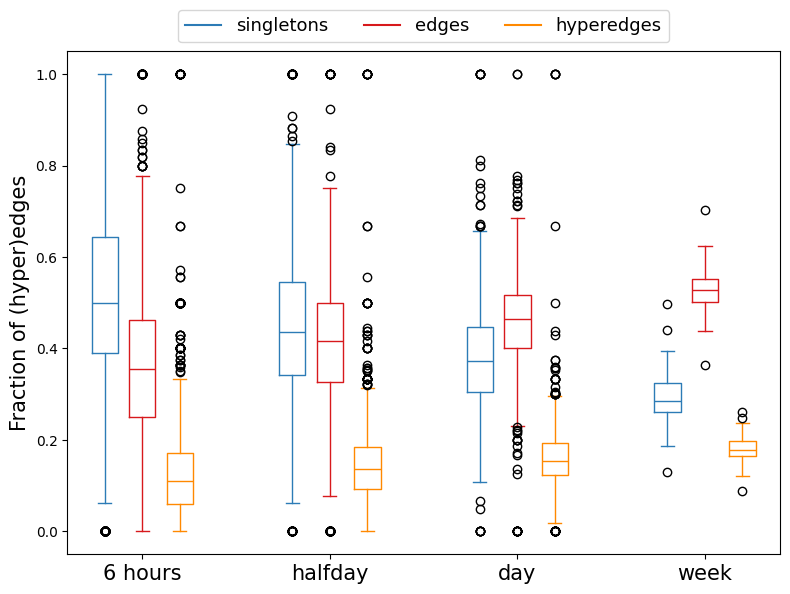

In [56]:
clf()

fig, ax = plt.subplots(1, figsize=(8, 6))

labels = ["singletons", "edges", "hyperedges"]
xtickslabels = ["6 hours", "halfday", "day", "week"]
colorz=["#2C7BB6", "#D7191C", "#FF8900", "#33CC33", "#cc0099", "#4d4dff", "#008080", "#2C7BB6"]

c = 1
val = -0.7
width = 0.35
mol = 2.5

b = plt.boxplot(singletons, positions=range(1, length(singletons))*mol.+val, widths=width)
set_box_color(b, colorz[c])
plt.plot([], c=colorz[c], label=labels[c])
c += 1

val+=0.5
b = plt.boxplot(edges, positions=range(1, length(edges))*mol.+val, widths=width)
set_box_color(b, colorz[c])
plt.plot([], c=colorz[c], label=labels[c])
c += 1

val+=0.5
b = plt.boxplot(hes, positions=range(1, length(hes))*mol.+val, widths=width)
set_box_color(b, colorz[c])
plt.plot([], c=colorz[c], label=labels[c])

plt.xticks(range(2.3, (length(singletons))*2.5, step=2.5), xtickslabels, fontsize="15", rotation=0)

plt.ylabel("Fraction of (hyper)edges", fontsize="15")

plt.legend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.1), fontsize="13")

plt.tight_layout()

gcf()